# Part 2 - Data challenge

In [2]:
library(tidyverse)
library(lubridate)

In [3]:
# import data - we're using the FDNY dataset
# https://data.cityofnewyork.us/Public-Safety/Incidents-Responded-to-by-Fire-Companies/tm6d-hbzd
master_tbl = read.csv('../../Data/Data_Wrangling/Incidents_Responded_to_by_Fire_Companies.csv',
    header = T, stringsAsFactors = F)
dim(master_tbl)
head(master_tbl)

[1] 2518758      24

,IM_INCIDENT_KEY,FIRE_BOX,INCIDENT_TYPE_DESC,INCIDENT_DATE_TIME,ARRIVAL_DATE_TIME,UNITS_ONSCENE,LAST_UNIT_CLEARED_DATE_TIME,HIGHEST_LEVEL_DESC,TOTAL_INCIDENT_DURATION,ACTION_TAKEN1_DESC,...,ZIP_CODE,BOROUGH_DESC,FLOOR,CO_DETECTOR_PRESENT_DESC,FIRE_ORIGIN_BELOW_GRADE_FLAG,STORY_FIRE_ORIGIN_COUNT,FIRE_SPREAD_DESC,DETECTOR_PRESENCE_DESC,AES_PRESENCE_DESC,STANDPIPE_SYS_PRESENT_FLAG
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>
1,55672688,2147,"300 - Rescue, EMS incident, other",01/01/2013 12:00:20 AM,01/01/2013 12:14:23 AM,1,01/01/2013 12:20:06 AM,"1 - More than initial alarm, less than Signal 7-5",1186,"00 - Action taken, other",...,10454,2 - Bronx,,,NA,NA,,,,NA
2,55672692,0818,735A - Unwarranted alarm/defective condition of alarm system,01/01/2013 12:00:37 AM,01/01/2013 12:09:03 AM,3,01/01/2013 12:30:06 AM,"1 - More than initial alarm, less than Signal 7-5",1769,86 - Investigate,...,10036,1 - Manhattan,,,NA,NA,,,,NA
3,55672693,9656,"300 - Rescue, EMS incident, other",01/01/2013 12:01:17 AM,01/01/2013 12:04:55 AM,1,01/01/2013 12:15:18 AM,"1 - More than initial alarm, less than Signal 7-5",841,"00 - Action taken, other",...,11418,5 - Queens,,,NA,NA,,,,NA
4,55672695,7412,412 - Gas leak (natural gas or LPG),01/01/2013 12:02:32 AM,01/01/2013 12:07:48 AM,4,01/01/2013 12:40:11 AM,"1 - More than initial alarm, less than Signal 7-5",2259,44 - Hazardous materials leak control & containment,...,11103,5 - Queens,1,,NA,NA,,,,NA
5,55672697,4019,735A - Unwarranted alarm/defective condition of alarm system,01/01/2013 12:01:49 AM,01/01/2013 12:06:27 AM,6,01/01/2013 12:24:56 AM,"1 - More than initial alarm, less than Signal 7-5",1387,86 - Investigate,...,11385,5 - Queens,,,NA,NA,,,,NA
6,55672698,1328,735A - Unwarranted alarm/defective condition of alarm system,01/01/2013 12:02:45 AM,01/01/2013 12:07:55 AM,3,01/01/2013 12:18:20 AM,"1 - More than initial alarm, less than Signal 7-5",935,86 - Investigate,...,11215,4 - Brooklyn,,,NA,NA,,,,NA


In [4]:
# Define some constants that will be used for this portion
BFIRE = '111 - Building fire'
SMOKE = '651 - Smoke scare, odor of smoke'
MALIC = '710 - Malicious, mischievous false call, other'
COOKF = '113 - Cooking fire, confined to container'
# unique(master_tbl$BOROUGH_DESC)
BOROS = c('1 - Manhattan', '2 - Bronx', '3 - Staten Island', '4 - Brooklyn',  '5 - Queens')

In [4]:
length(unique(master_tbl$INCIDENT_TYPE_DESC))

[1] 182

In [8]:
# For all answers, I'm going to report up to 5 decimals, same as the coding challenge
# Q1 - most common call proportion
counter = master_tbl %>% count(INCIDENT_TYPE_DESC) %>% arrange(desc(n))
head(counter)
print(paste0('The most common type is: ', counter$INCIDENT_TYPE_DESC[1]))
# Incident type 300 takes up about 36% of all rows
counter$n[1] / nrow(master_tbl)

,INCIDENT_TYPE_DESC,n
,<chr>,<int>
1,"300 - Rescue, EMS incident, other",906466
2,"651 - Smoke scare, odor of smoke",161886
3,353 - Removal of victim(s) from stalled elevator,131509
4,"710 - Malicious, mischievous false call, other",129466
5,522 - Water or steam leak,122716
6,412 - Gas leak (natural gas or LPG),119324


[1] "The most common type is: 300 - Rescue, EMS incident, other"


[1] 0.3598861

In [14]:
# Q2 - differences in number of units arriving by incident type
# Note - for calculation of means, NA's were omitted
# (default assumption for missing data with no need for imputation)
sub_tbl = master_tbl %>% drop_na(UNITS_ONSCENE)
sum(sub_tbl$INCIDENT_TYPE_DESC == BFIRE)
sum(sub_tbl$INCIDENT_TYPE_DESC == SMOKE)
head(sub_tbl)
mu_1 = mean((sub_tbl %>% filter(INCIDENT_TYPE_DESC == BFIRE))[['UNITS_ONSCENE']])
mu_2 = mean((sub_tbl %>% filter(INCIDENT_TYPE_DESC == SMOKE))[['UNITS_ONSCENE']])
mu_1
mu_2
# average for BFIRE is about 11.2, while for SMOKE it is 4.0
mu_1 / mu_2

[1] 14048

[1] 160934

,IM_INCIDENT_KEY,FIRE_BOX,INCIDENT_TYPE_DESC,INCIDENT_DATE_TIME,ARRIVAL_DATE_TIME,UNITS_ONSCENE,LAST_UNIT_CLEARED_DATE_TIME,HIGHEST_LEVEL_DESC,TOTAL_INCIDENT_DURATION,ACTION_TAKEN1_DESC,...,ZIP_CODE,BOROUGH_DESC,FLOOR,CO_DETECTOR_PRESENT_DESC,FIRE_ORIGIN_BELOW_GRADE_FLAG,STORY_FIRE_ORIGIN_COUNT,FIRE_SPREAD_DESC,DETECTOR_PRESENCE_DESC,AES_PRESENCE_DESC,STANDPIPE_SYS_PRESENT_FLAG
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>
1,55672688,2147,"300 - Rescue, EMS incident, other",01/01/2013 12:00:20 AM,01/01/2013 12:14:23 AM,1,01/01/2013 12:20:06 AM,"1 - More than initial alarm, less than Signal 7-5",1186,"00 - Action taken, other",...,10454,2 - Bronx,,,NA,NA,,,,NA
2,55672692,0818,735A - Unwarranted alarm/defective condition of alarm system,01/01/2013 12:00:37 AM,01/01/2013 12:09:03 AM,3,01/01/2013 12:30:06 AM,"1 - More than initial alarm, less than Signal 7-5",1769,86 - Investigate,...,10036,1 - Manhattan,,,NA,NA,,,,NA
3,55672693,9656,"300 - Rescue, EMS incident, other",01/01/2013 12:01:17 AM,01/01/2013 12:04:55 AM,1,01/01/2013 12:15:18 AM,"1 - More than initial alarm, less than Signal 7-5",841,"00 - Action taken, other",...,11418,5 - Queens,,,NA,NA,,,,NA
4,55672695,7412,412 - Gas leak (natural gas or LPG),01/01/2013 12:02:32 AM,01/01/2013 12:07:48 AM,4,01/01/2013 12:40:11 AM,"1 - More than initial alarm, less than Signal 7-5",2259,44 - Hazardous materials leak control & containment,...,11103,5 - Queens,1,,NA,NA,,,,NA
5,55672697,4019,735A - Unwarranted alarm/defective condition of alarm system,01/01/2013 12:01:49 AM,01/01/2013 12:06:27 AM,6,01/01/2013 12:24:56 AM,"1 - More than initial alarm, less than Signal 7-5",1387,86 - Investigate,...,11385,5 - Queens,,,NA,NA,,,,NA
6,55672698,1328,735A - Unwarranted alarm/defective condition of alarm system,01/01/2013 12:02:45 AM,01/01/2013 12:07:55 AM,3,01/01/2013 12:18:20 AM,"1 - More than initial alarm, less than Signal 7-5",935,86 - Investigate,...,11215,4 - Brooklyn,,,NA,NA,,,,NA


[1] 11.2201

[1] 4.005524

[1] 2.801157

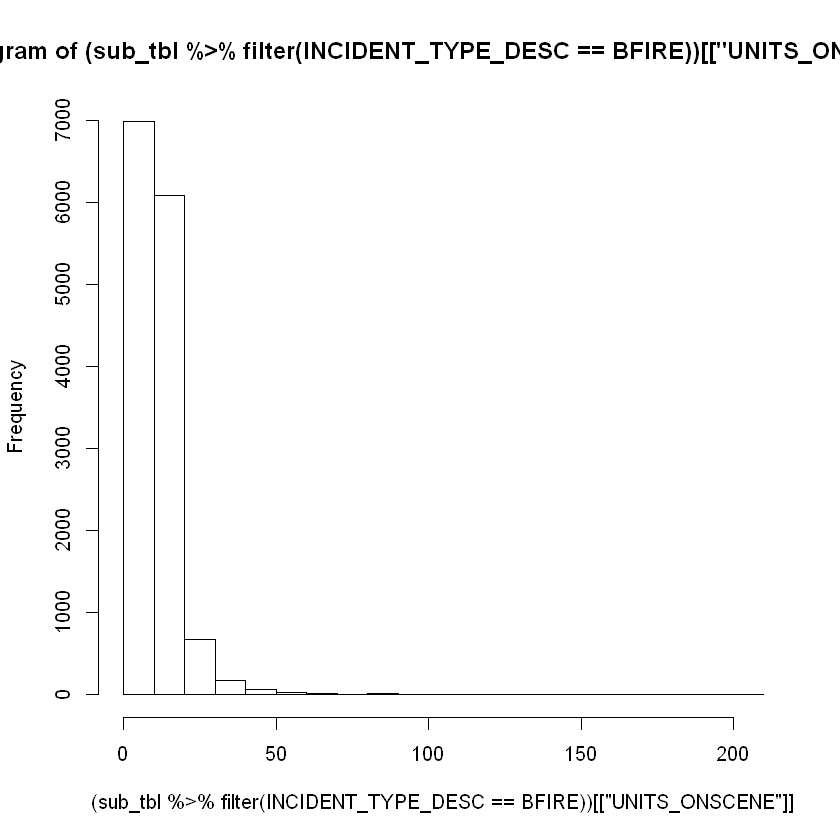

In [15]:
# average seems pretty skewed by outliers
hist((sub_tbl %>% filter(INCIDENT_TYPE_DESC == BFIRE))[['UNITS_ONSCENE']])

In [18]:
# Q3 - false call in diff. boroughs
sum(master_tbl$BOROUGH_DESC == BOROS[1])
sum(master_tbl$BOROUGH_DESC == BOROS[5])
sum(master_tbl$INCIDENT_TYPE_DESC == MALIC)
# Staten Island is BORO[5] and Manhattan is BORO[1]
# Calculate the ratio of MALIC for each boro, and calculate the final ratio
sub_tbl_5 = master_tbl %>% filter(BOROUGH_DESC == BOROS[5])
prop_5 = sum(sub_tbl_5$INCIDENT_TYPE_DESC == MALIC) / nrow(sub_tbl_5)
sub_tbl_1 = master_tbl %>% filter(BOROUGH_DESC == BOROS[1])
prop_1 = sum(sub_tbl_1$INCIDENT_TYPE_DESC == MALIC) / nrow(sub_tbl_1)
prop_5
prop_1
# false call rate for BORO[5] is about 0.556, for BORO[1] is about 0.0429
prop_5 / prop_1

[1] 641825

[1] 509106

[1] 129466

[1] 0.05560924

[1] 0.04292603

[1] 1.295467

[1] 2.666667

,IM_INCIDENT_KEY,INCIDENT_TYPE_DESC,INCIDENT_DATE_TIME,ARRIVAL_DATE_TIME,int_minutes
,<int>,<chr>,<chr>,<chr>,<dbl>
14197,63470467,111 - Building fire,06/29/2018 09:47:44 PM,06/29/2018 09:51:47 PM,4.050000
14198,63472868,111 - Building fire,06/30/2018 10:36:51 AM,06/30/2018 10:39:36 AM,2.750000
14199,63473162,111 - Building fire,06/30/2018 12:00:32 PM,06/30/2018 12:03:48 PM,3.266667
14200,63474272,111 - Building fire,06/30/2018 03:48:42 PM,06/30/2018 03:52:25 PM,3.716667
14201,63474545,111 - Building fire,06/30/2018 04:45:17 PM,06/30/2018 04:49:52 PM,4.583333
14202,63475053,111 - Building fire,06/30/2018 06:20:20 PM,06/30/2018 06:24:00 PM,3.666667


0%       25%       50%       75%      100% 
-5.083333  2.866667  3.466667  4.166667 88.983333

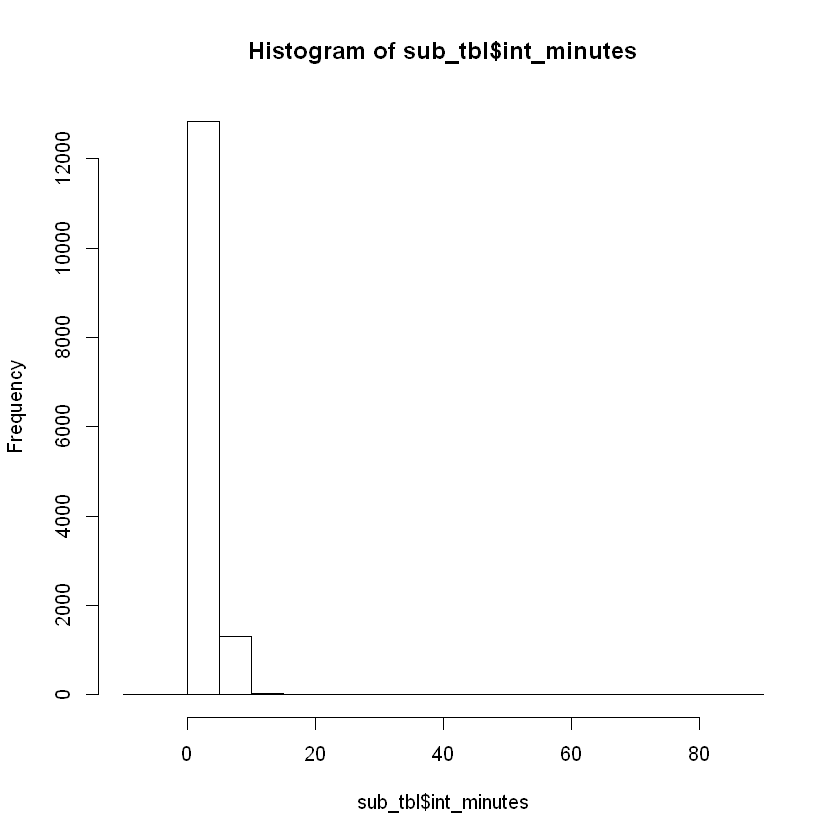

In [20]:
# Q4 - distribution of amount of time it takes for the first unit to arrive
# define a function that calculates the number of minutes between two dt entries from our datasets
# uses int_length() and interval() from lubridate
int_minutes = function(dt1, dt2) {
    # Assumes that the dt1, dt2 strings come in the right format and timezone is EST,
    # as supplied by this dataset. Also assumes dt2 is after dt1
    return(int_length(
        interval(mdy_hms(dt1, tz = 'EST'), mdy_hms(dt2, tz = 'EST'))
    ) / 60)
}
dt1 = '01/01/2013 12:58:10 AM'
dt2 = '01/01/2013 01:00:50 AM'
int_minutes(dt1, dt2)

sub_tbl = master_tbl %>% filter(INCIDENT_TYPE_DESC == BFIRE) %>% select(
    c('IM_INCIDENT_KEY', 'INCIDENT_TYPE_DESC', 'INCIDENT_DATE_TIME', 'ARRIVAL_DATE_TIME'))
sub_tbl$int_minutes = do.call(int_minutes, sub_tbl %>% 
    rename(dt1 = 'INCIDENT_DATE_TIME', dt2 = 'ARRIVAL_DATE_TIME') %>% select(c('dt1', 'dt2')))
tail(sub_tbl)
# Some rows are missing entries and thus yielding NA
sub_tbl = sub_tbl %>% drop_na(int_minutes)
hist(sub_tbl$int_minutes)
# there was one quirky data point where dt2 was before dt1?
# obtain the third quartile (75%), as directed
quantile(sub_tbl$int_minutes)

In [17]:
# Q5 - cooking hours inferred by incident type
# calculate the hour of the incidents using hour() function of lubridate
master_tbl$hr = hour(mdy_hms(master_tbl$INCIDENT_DATE_TIME, tz = 'EST'))
# head(master_tbl)
# Calculate total number of incidents by hour
hour_counts = master_tbl %>% count(hr)
# Calculate cooking fire incidents by hour
hour_counts$COOKF_n = sapply(hour_counts$hr, function(x) {nrow(master_tbl %>% 
    filter(hr == x, INCIDENT_TYPE_DESC == COOKF))})
hour_counts$proportion = hour_counts$COOKF_n / hour_counts$n
hour_counts %>% arrange(desc(proportion))

hr,n,COOKF_n,proportion
<int>,<int>,<int>,<dbl>
18,148219,7573,0.05109331
19,141356,7157,0.05063103
17,151173,7165,0.04739603
20,133364,6120,0.04588945
16,142248,6262,0.04402171
12,129813,5479,0.04220687
15,140070,5700,0.04069394
13,134589,5423,0.04029304
14,139537,5512,0.03950207


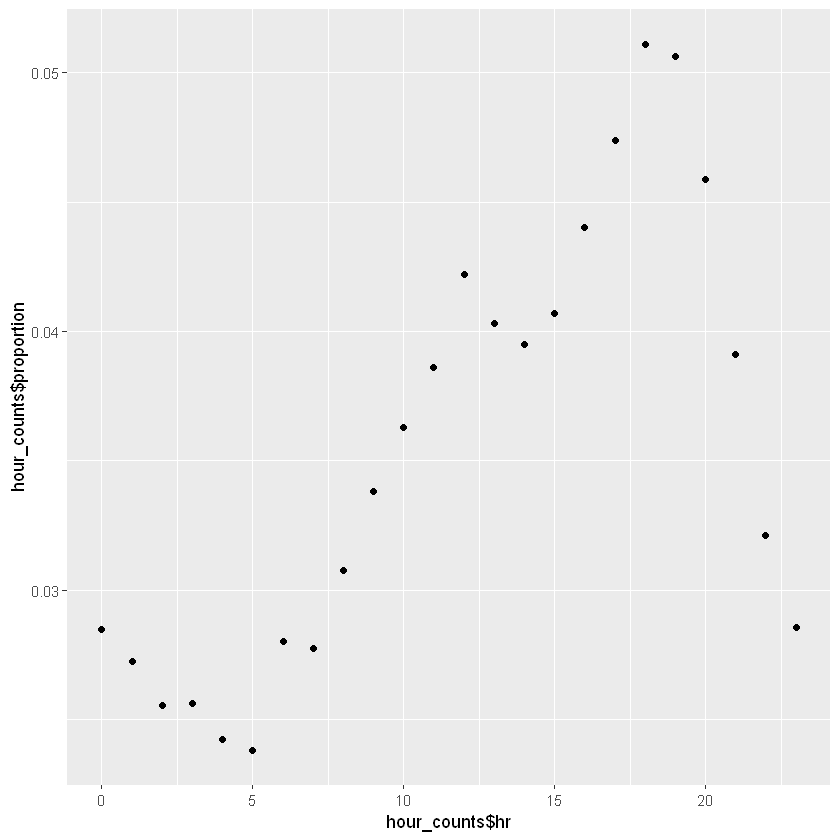

In [16]:
# we see the spike during dinner hours - esp. hours 17, 18, 19
qplot(hour_counts$hr, hour_counts$proportion)

,ZIP_CODE,n,Population
,<dbl>,<int>,<int>
1,10001,88,24117
2,10002,122,74479
3,10003,94,53977
4,10004,9,3335
5,10005,7,8701
6,10006,5,3092


[1] 0.7911394

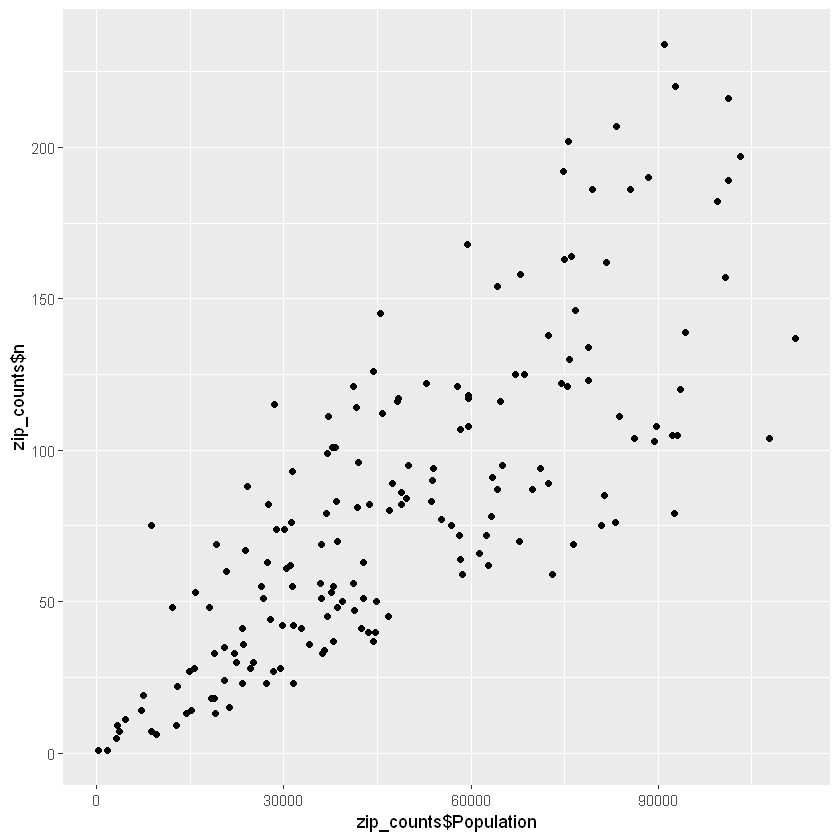

In [18]:
# Q6 - r^2 between population and building fires
# read in the parsed table:
# this part was run by a python snippet. The code is in Scripts/simple_web_scraper.py and also copied below:
# # python snippet to import data table for part 2
# # from https://www.newyork-demographics.com/zip_codes_by_population
# # lxml was installed along with python for nice parsing of the table
# import urllib.request as urllib2
# import pandas as pd
# link = 'https://www.newyork-demographics.com/zip_codes_by_population'
# response = urllib2.urlopen(link)
# contents = response.read()
# tbl = pd.read_html(contents)[0]
# # However, some zip code entries need to be parsed manually
# # Since this table is small (~1600 rows) and main processing is being done in another script,
# # I'm going to write the rows manually
# out_file = '../../Table/zip_pop.tsv'
# out_fhandle = open(out_f, 'w')
# out_fhandle.write('ZIP_CODE\tPopulation\n')
# for i in range(len(tbl)-1):
#     zip_array = tbl['Zip Code'][i].replace(' and ', ', ').replace(',,', ',').split(', ')
#     for z in zip_array:
#         out_fhandle.write('%s\t%s\n' % (z, tbl['Population'][i]))
# out_fhandle.close()

# Now we can read in the processed zip code table
sub_tbl = master_tbl %>% filter(INCIDENT_TYPE_DESC == BFIRE)
zip_pop = read.table('../../Table/zip_pop.tsv', sep = '\t', header = T, stringsAsFactors = F)
zip_counts = sub_tbl %>% count(ZIP_CODE)
# convert strings into numeric type
zip_counts$ZIP_CODE = as.numeric(zip_counts$ZIP_CODE)
# do a left_join() to merge the metadata table
# some zip codes are missing in the table imported from website - remove these rows
zip_counts = zip_counts %>% left_join(zip_pop, by = 'ZIP_CODE') %>% drop_na(Population)
head(zip_counts)
qplot(zip_counts$Population, zip_counts$n)
cor(zip_counts$n, zip_counts$Population)

In [23]:
# Q7 - CO detector and fire duration, sig. testing
# unique(master_tbl$CO_DETECTOR_PRESENT_DESC)
# Let's only take 'Yes' and 'No' counts
with_CO_detect = master_tbl %>% filter(CO_DETECTOR_PRESENT_DESC == 'Yes')
without_CO_detect = master_tbl %>% filter(CO_DETECTOR_PRESENT_DESC == 'No')
# construct contingency table
threshold = 3600
tbl = c(c(
        sum(without_CO_detect$TOTAL_INCIDENT_DURATION > threshold),
        sum(with_CO_detect$TOTAL_INCIDENT_DURATION > threshold)), 
    c(nrow(without_CO_detect), nrow(with_CO_detect)))
tbl
chisq.test(tbl)
# X-squared = 51799, df = 3, p-value < 2.2e-16

[1]   941   927  6273 26729


	Chi-squared test for given probabilities

data:  tbl
X-squared = 51799, df = 3, p-value < 2.2e-16
